In [1]:
import numpy as np

from qiskit.circuit import Parameter
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import Operator, SparsePauliOp
from qiskit.visualization import circuit_drawer, plot_histogram

import sys
sys.path.append("..")
from vqe_algorithm import *

In [2]:
# Creamos el Hamiltoniano del oscilador anharmónico unidimensional

def create_annihilation_operator(d):
    a = np.zeros((d, d))
    for n in range(1, d):
        a[n-1, n] = np.sqrt(n)
    return a

d = 2**3 
a = create_annihilation_operator(d)
adag = a.T
identity = np.eye(d)

lam = 0.1
n_op = adag @ a
x_matrix = 1/np.sqrt(2)*(a + adag)
x4_matrix = np.linalg.matrix_power(x_matrix, 4)

H_matrix = n_op + 0.5 * identity + lam * x4_matrix

# Lo expresamos como combinación de cadenas de Pauli
hamiltonian = SparsePauliOp.from_operator(Operator(H_matrix))
print(hamiltonian)

SparsePauliOp(['III', 'IIZ', 'IXI', 'IXZ', 'IZI', 'IZZ', 'XII', 'XIZ', 'XXI', 'XXZ', 'XZI', 'XZZ', 'YYI', 'YYZ', 'ZII', 'ZIZ', 'ZXI', 'ZXZ', 'ZZI', 'ZZZ'],
              coeffs=[ 6.275     +0.j, -0.5       +0.j,  1.68832796+0.j, -0.07602491+0.j,
 -1.25      +0.j, -0.45      +0.j,  0.39881156+0.j, -0.10040349+0.j,
  0.80622419+0.j, -0.2000064 +0.j, -0.20064368+0.j,  0.0247101 +0.j,
  0.80622419+0.j, -0.2000064 +0.j, -3.45      +0.j, -0.3       +0.j,
 -1.27607573+0.j, -0.12409529+0.j, -0.35      +0.j,  0.6       +0.j])


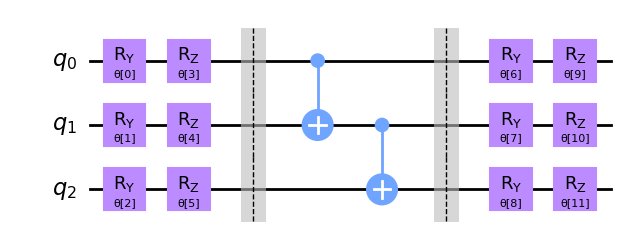

In [3]:
# Generamos un ansatz EfficientSU2 de 3 cúbits

theta = Parameter("θ")
ansatz = EfficientSU2(
    num_qubits=3,
    entanglement='linear',
    reps=1,
    insert_barriers=True
)

circuit_drawer(
    ansatz.decompose(),
    output='mpl',
    filename='images/ansatz_efficientsu2.png',
    style='clifford'
)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.559135859397413
       x: [-3.528e-05  9.169e-03  8.116e-03  1.177e-01  4.994e-02
           -1.598e-02 -7.233e-05 -1.409e-01 -2.371e-02  4.045e-02
            1.046e-02 -1.661e-02]
    nfev: 841
   maxcv: 0.0


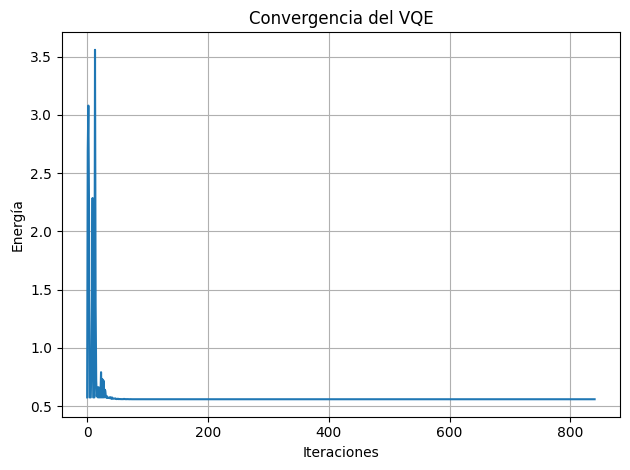

<IPython.core.display.Latex object>

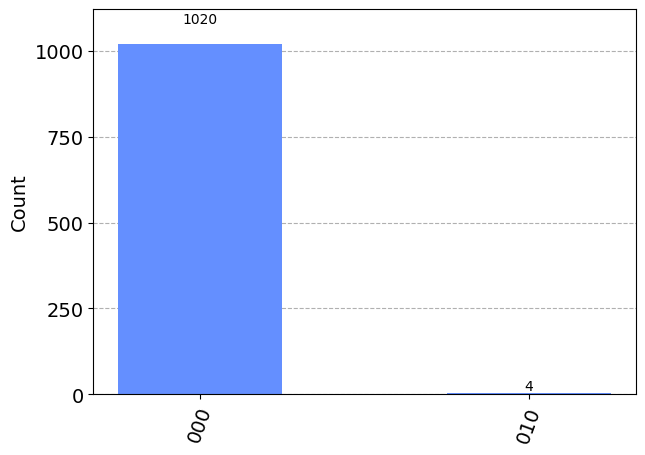

In [4]:
# Aplicamos el VQE
result, cost_history = run_vqe(ansatz, hamiltonian)

# Representamos la evolución de la energía durante la optimización
print(result)
plot_cost_history(cost_history, "cost_history_anharmonic_o")

# Obtenemos el estado cuántico
sv = get_statevector(ansatz, result["x"])
display(sv.draw('latex'))

# Simulamos la medición del circuito con parámetors óptimos y representamos el histograma
counts = simulate_measurement(ansatz, result["x"])
fig = plot_histogram(counts)
fig.figure.savefig("images/histogram_counts_anharmonic_o.png")
display(fig)